# Домашно 1


### В това домашно задачата ви е да класифицирате всяка картинка от тестовото множество във 53-те различни класа. Накрая покажете какво е accuracy-то на вашия модел върху това тестово множество. (Accuracy = Correct/Total).

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import pandas as pd
from google.colab import files

### За да можете да заредите Kaggle dataset, трябва да се логнете в Kaggle и да изтеглите API Token от Settings -> Create New Token. Това ще свали kaggle.json файл, който трябва да качите в следващата клетка.

In [2]:
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
! kaggle datasets download -d gpiosenka/cards-image-datasetclassification
! unzip cards-image-datasetclassification.zip -d cards-image-datasetclassification

Streaming output truncated to the last 5000 lines.
  inflating: cards-image-datasetclassification/train/jack of spades/059.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/060.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/061.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/062.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/063.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/064.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/065.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/066.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/067.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/068.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/069.jpg  
  inflating: cards-image-datasetclassification/train/jack of spades/070.jpg  
  inflating: 

In [128]:
df = pd.read_csv("/content/cards-image-datasetclassification/cards.csv")
df.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


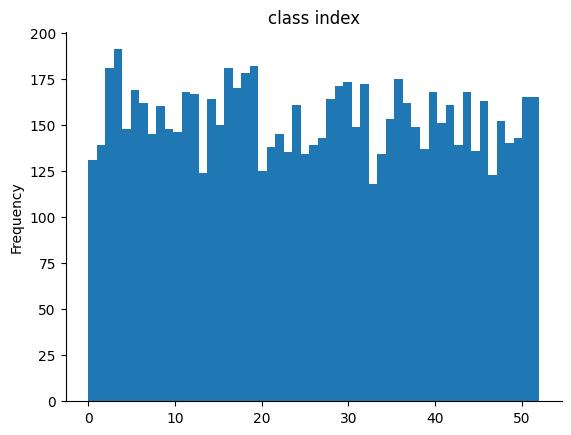

In [129]:
# @title class index

from matplotlib import pyplot as plt
df['class index'].plot(kind='hist', bins=53, title='class index')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [130]:
df[df["data set"] == "train"].shape, df[df["data set"] == "valid"].shape, df[df["data set"] == "test"].shape,

((7625, 5), (265, 5), (265, 5))

In [131]:
df["labels"].unique()

array(['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',

In [132]:
#I think this is a problem with the data

df[~df['filepaths'].str.contains('.jpg')]

,class index,filepaths,labels,card type,data set
120,0,train/ace of clubs/output,ace of clubs,ace,train


In [133]:
df=df[df['filepaths'].str.contains('.jpg')]

In [134]:
BATCH_SIZE=16

'23'

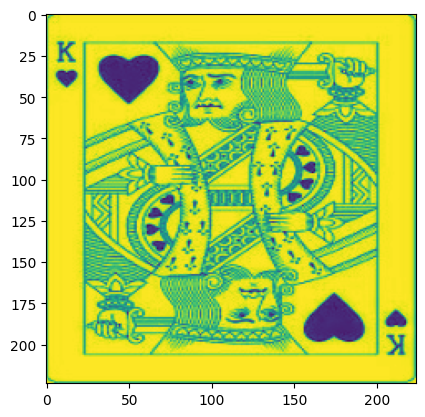

In [135]:
import os
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt
index=3500
img=read_image('cards-image-datasetclassification/'+df.iloc[index,1])
label=df.iloc[index,0]
plt.imshow(img[0])
str(label)

In [136]:
import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image
from torchvision.datasets import ImageFolder


class CustomImageDataset(Dataset):
    def __init__(self, df, transform=None, target_transform=None):
        self.img_labels = df
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        label = self.img_labels.iloc[idx, 0]
        img_path=self.img_labels.iloc[idx, 1]
        #img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        #image = read_image('cards-image-datasetclassification/'+img_path)
        image = Image.open('cards-image-datasetclassification/'+img_path).convert('RGB')
        #image.load()
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

#I found this on the internet
#class CustomImageDataset(Dataset):
#    def __init__(self, data_dir,transform=None):
#        self.data = ImageFolder(data_dir, transform=transform)
#
#    def __len__(self):
#        return len(self.data)
#
#    def __getitem__(self, idx):
#        return self.data[idx]

In [137]:
#from torchvision.transforms import v2
#from torch.utils.data import DataLoader
#
#
#transform = v2.Compose([
#    v2.Resize((64,64)),
#    v2.ToTensor(),
#    v2.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
#])
#train_folder = 'cards-image-datasetclassification/train'
#valid_folder = 'cards-image-datasetclassification/valid'
#
#train_dataset = CustomImageDataset(train_folder, transform=transform)
#val_dataset = CustomImageDataset(valid_folder, transform=transform)
#
#train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle= True)
#test_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle= True)

/usr/local/lib/python3.11/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


'23'

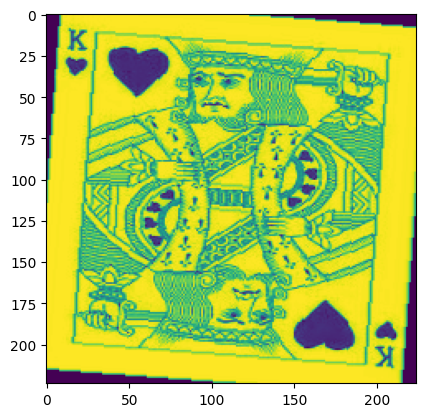

In [138]:
from torchvision.transforms import v2


transforms_train = v2.Compose([
    #v2.Resize((128,128)),
    v2.RandomRotation(degrees=10),
    v2.ToTensor(),
    v2.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
])

transform_test=v2.Compose([
    #v2.Resize((128,128)),
    v2.ToTensor(),
    v2.Normalize(mean=[.5,.5,.5],std=[.5,.5,.5])
])

train_dataset=CustomImageDataset(df[df["data set"] == "train"],transform=transforms_train)
val_dataset=CustomImageDataset(df[df["data set"] == "valid"],transform=transform_test)
test_dataset=CustomImageDataset(df[df["data set"] == "test"],transform=transform_test)
index=3500
img,label=train_dataset[index]
plt.imshow(img[0])
str(label)

In [139]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print("Train data:",len(train_dataset))
print("Validation data:",len(val_dataset))
print("Test data:",len(test_dataset))
print("Train data batches:",len(train_dataloader))
print("Validation data batches:",len(val_dataloader))
print("Test data batches:",len(test_dataloader))

Train data: 7624
Validation data: 265
Test data: 265
Train data batches: 477
Validation data batches: 17
Test data batches: 17


In [140]:
import torch.nn.functional as F

def accuracy_fn(y_pred,y_true):

    y_pred_class = torch.argmax(y_pred,dim=1)
    acc = (y_pred_class == y_true).sum().item()/len(y_pred)


    return acc


def train_step(model,dataloader,loss_func,acc_func,optimizer,device):
    model.train()
    train_loss=0
    train_acc=0
    for data,label in dataloader:
        data=data.to(device)
        label=label.to(device)


        optimizer.zero_grad()
        y_pred=model(data)

        loss=loss_func(y_pred,label)
        train_loss+=loss


        loss.backward()
        optimizer.step()

        train_acc+=acc_func(y_pred,label)
    return float(train_loss/len(dataloader)),float(train_acc/len(dataloader))


def test_step(model,dataloader,loss_func,acc_func,device):
    model.eval()
    test_loss=0
    test_acc=0

    for data,label in dataloader:
        data=data.to(device)
        label=label.to(device)

        y_pred=model(data)
        test_loss+=loss_func(y_pred,label)
        test_acc+=acc_func(y_pred,label)

    return float(test_loss/len(dataloader)),float(test_acc/len(dataloader))


def train(model,train_dataloader,test_dataloader,optimizer,loss_func,acc_func,epochs,device):

    train_losses=[]
    train_accs=[]
    test_losses=[]
    test_accs=[]
    for i in range(epochs):

        train_loss,train_acc=train_step(model,train_dataloader,loss_func,acc_func,optimizer,device)
        train_losses.append(train_loss)
        train_accs.append(train_acc)
        test_loss,test_acc=0,0
        test_loss,test_acc=test_step(model,test_dataloader,loss_func,acc_func,device)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print("Epoch:",i,"Train_loss:",train_loss,"Train_acc:",train_acc,"Test_loss:",test_loss,"Test acc:",test_acc)

    return train_losses,train_accs,test_losses,test_accs

def plot_loss_curves(results):

    loss = results[0]
    test_loss = results[2]

    accuracy = results[1]
    test_accuracy = results[3]

    epochs = range(len(results[0]))

    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [141]:
from torch import nn
#First model
class CNN(nn.Module):
    def __init__(self,in_channels=3,hidden_channels=16,output_shape=53) -> None:
        super().__init__()

        self.conv= nn.Sequential(
            nn.Conv2d(in_channels,out_channels=hidden_channels,kernel_size=3,stride=1,padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_channels,out_channels=hidden_channels*2,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_channels*2),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            nn.ReLU(),

            nn.Conv2d(in_channels=hidden_channels*2,out_channels=hidden_channels*4,kernel_size=3,stride=1,padding=0),
            nn.BatchNorm2d(hidden_channels*4),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            nn.ReLU(),
        )
        self.liner=nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=hidden_channels*4*14*14,out_features=512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features=512, out_features=output_shape)
#
        )

    def forward(self,x):
      x=self.conv(x)
      x=self.liner(x)
      return x


In [142]:
#Second model

class ResidualConnection(nn.Module):
    def __init__(self,in_channels,middle_channels):
        super().__init__()
        self.cn1= nn.Conv2d(in_channels,out_channels=middle_channels,kernel_size=3,stride=1,padding=1)
        self.bn1=nn.BatchNorm2d(middle_channels)
        self.cn2= nn.Conv2d(middle_channels,out_channels=in_channels,kernel_size=3,stride=1,padding=1)
        self.bn2=nn.BatchNorm2d(in_channels)

    def forward(self,x):
      residual=x
      x=F.relu(self.bn1(self.cn1(x)))
      x=self.bn2(self.cn2(x))
      x+=residual

      return F.relu(x)


class MyResNet(nn.Module):
    def __init__(self,in_channels=3,hidden_channels=32,output_shape=53):
        super().__init__()
        self.initial_layer=nn.Sequential(
            nn.Conv2d(in_channels,out_channels=hidden_channels,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU()
            )
        self.res1=nn.Sequential(
            ResidualConnection(hidden_channels,hidden_channels*2),
            ResidualConnection(hidden_channels,hidden_channels*2),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
        )
        self.middle=nn.Sequential(
                      nn.Conv2d(hidden_channels, out_channels=hidden_channels*2,kernel_size=3, padding=1),
                      nn.BatchNorm2d(hidden_channels*2),
                      nn.ReLU())

        self.res2=nn.Sequential(
            ResidualConnection(hidden_channels*2,hidden_channels*4),
            ResidualConnection(hidden_channels*2,hidden_channels*4),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
        )

        self.middle2=nn.Sequential(
                      nn.Conv2d(hidden_channels*2, out_channels=hidden_channels*4,kernel_size=3, padding=1),
                      nn.BatchNorm2d(hidden_channels*4),
                      nn.ReLU())

        self.res3=nn.Sequential(
            ResidualConnection(hidden_channels*4,hidden_channels*8),
            ResidualConnection(hidden_channels*4,hidden_channels*8),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
        )

        self.linear=nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=hidden_channels*4*14*14,out_features=216),
            nn.BatchNorm1d(216),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features=216,out_features=output_shape)

        )

    def forward(self,x):
        x=self.initial_layer(x)
        x=self.res1(x)
        x=self.middle(x)
        x=self.res2(x)
        x=self.middle2(x)
        x=self.res3(x)
        x=self.linear(x)
        return x


In [143]:
class EffNetConv2d(nn.Module):
    def __init__(self,in_channels,out_channels):
        super().__init__()
        self.res_connection=in_channels==out_channels
        self.cn1= nn.Conv2d(in_channels,out_channels=in_channels,kernel_size=3,stride=1,padding=1,groups=in_channels)
        self.bn1=nn.BatchNorm2d(in_channels)
        self.cn2= nn.Conv2d(in_channels,out_channels=out_channels,kernel_size=1,stride=1)
        self.bn2=nn.BatchNorm2d(out_channels)

    def forward(self,x):
        residual=x
        x=self.bn1(self.cn1(x))
        #x+=residual
        x=F.relu(x)
        x=self.bn2(self.cn2(x))
        if(self.res_connection):
          x+=residual
        return F.relu(x)


class EffNet(nn.Module):
    def __init__(self,in_channels=3,hidden_channels=8,output_shape=53):
        super().__init__()
        self.initial_layer=nn.Sequential(
            nn.Conv2d(in_channels,out_channels=hidden_channels,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(hidden_channels),
            nn.ReLU()
            )
        self.cnn1=nn.Sequential(
            EffNetConv2d(hidden_channels,hidden_channels),
            EffNetConv2d(hidden_channels,hidden_channels*2),
            EffNetConv2d(hidden_channels*2,hidden_channels*2),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            )
        self.middle=nn.Sequential(
              nn.Conv2d(hidden_channels*2, out_channels=hidden_channels*4,kernel_size=3, padding=1,stride=2),
              nn.BatchNorm2d(hidden_channels*4),
              nn.ReLU())
        self.cnn2=nn.Sequential(
            EffNetConv2d(hidden_channels*4,hidden_channels*4),
            EffNetConv2d(hidden_channels*4,hidden_channels*8),
            EffNetConv2d(hidden_channels*8,hidden_channels*8),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            )

        self.middle2=nn.Sequential(
                      nn.Conv2d(hidden_channels*8, out_channels=hidden_channels*16,kernel_size=3, padding=1,stride=2),
                      nn.BatchNorm2d(hidden_channels*16),
                      nn.ReLU())

        self.cnn3=nn.Sequential(
            EffNetConv2d(hidden_channels*16,hidden_channels*16),
            EffNetConv2d(hidden_channels*16,hidden_channels*32),
            EffNetConv2d(hidden_channels*32,hidden_channels*32),
            nn.MaxPool2d(kernel_size=(2,2),stride=2,padding=0),
            )
        self.middle3=nn.Sequential(
                      nn.Conv2d(hidden_channels*32, out_channels=hidden_channels*32,kernel_size=3, padding=1),
                      nn.BatchNorm2d(hidden_channels*32),
                      nn.ReLU())

        self.linear=nn.Sequential(
            nn.Flatten(),
            nn.Dropout(p=0.3),
            nn.Linear(in_features=hidden_channels*32*3*3,out_features=128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(in_features=128,out_features=output_shape)

        )


    def forward(self,x):
        x=self.initial_layer(x)
        x=self.cnn1(x)
        x=self.middle(x)
        x=self.cnn2(x)
        x=self.middle2(x)
        x=self.cnn3(x)
        #x=self.middle3(x)
        x=self.linear(x)
        return x

In [144]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device


'cuda'

In [145]:
from torchsummary import summary

#model=CNN().to(device)
#model=MyResNet().to(device)
model=EffNet().to(device)
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 112, 112]             224
       BatchNorm2d-2          [-1, 8, 112, 112]              16
              ReLU-3          [-1, 8, 112, 112]               0
            Conv2d-4          [-1, 8, 112, 112]              80
       BatchNorm2d-5          [-1, 8, 112, 112]              16
            Conv2d-6          [-1, 8, 112, 112]              72
       BatchNorm2d-7          [-1, 8, 112, 112]              16
      EffNetConv2d-8          [-1, 8, 112, 112]               0
            Conv2d-9          [-1, 8, 112, 112]              80
      BatchNorm2d-10          [-1, 8, 112, 112]              16
           Conv2d-11         [-1, 16, 112, 112]             144
      BatchNorm2d-12         [-1, 16, 112, 112]              32
     EffNetConv2d-13         [-1, 16, 112, 112]               0
           Conv2d-14         [-1, 16, 1

In [146]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.003,weight_decay=1e-4)

In [147]:
torch.autograd.set_detect_anomaly(True)

In [ ]:
result=train(model,train_dataloader,val_dataloader,optimizer,loss_fn,accuracy_fn,50,device)

Epoch: 0 Train_loss: 2.8673503398895264 Train_acc: 0.21108490566037735 Test_loss: 1.8885960578918457 Test acc: 0.36151960784313725
Epoch: 1 Train_loss: 2.134458303451538 Train_acc: 0.3704140461215933 Test_loss: 1.298998475074768 Test acc: 0.5784313725490197
Epoch: 2 Train_loss: 1.7905999422073364 Train_acc: 0.49488993710691825 Test_loss: 0.8737279772758484 Test acc: 0.7626633986928105
Epoch: 3 Train_loss: 1.5445234775543213 Train_acc: 0.576912997903564 Test_loss: 0.8161750435829163 Test acc: 0.7516339869281046
Epoch: 4 Train_loss: 1.4103575944900513 Train_acc: 0.6020702306079665 Test_loss: 0.734769344329834 Test acc: 0.7847222222222223
Epoch: 5 Train_loss: 1.3275009393692017 Train_acc: 0.6281446540880503 Test_loss: 0.6269760131835938 Test acc: 0.8251633986928105
Epoch: 6 Train_loss: 1.252986192703247 Train_acc: 0.6445230607966457 Test_loss: 0.575039803981781 Test acc: 0.8280228758169935
Epoch: 7 Train_loss: 1.1958513259887695 Train_acc: 0.6628668763102725 Test_loss: 0.6379173398017883 

In [ ]:
plot_loss_curves(result)